In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Activation
from keras.layers import TimeDistributed, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from keras import backend as K

raw = open('data_training_alo', 'r').readlines()

all_x = []
point = []
for line in raw:
    stripped_line = line.strip().replace(' ','')
    stripped_line = stripped_line.split('\t')
    if len(stripped_line) == 2:
        point.append(stripped_line)
    if line == '\n':
        all_x.append(point)
        point = []
all_x = all_x[:-1]

Using TensorFlow backend.


In [2]:
print(all_x)

[[['dok', 'O'], ['penumpukan', 'B-DISEASE'], ['cairan', 'I-DISEASE'], ['di', 'B-BBODY'], ['otak', 'I-BBODY'], ['di', 'O'], ['sebabkan', 'O'], ['karena', 'O'], ['apa', 'O']], [['malam', 'O'], ['dok', 'O'], ['saya', 'O'], ['berumur', 'O'], ['17', 'B-CHILD'], ['tahun', 'I-CHILD'], ['2', 'O'], ['minggu', 'O'], ['yang', 'O'], ['lalau', 'O'], ['saya', 'O'], ['terkena', 'O'], ['gejala', 'O'], ['pada', 'O'], ['usus', 'B-DISEASE'], ['buntu', 'I-DISEASE'], ['hanya', 'O'], ['infeksi', 'B-DISEASE'], ['tetapi', 'O'], ['dokter', 'O'], ['tidak', 'O'], ['menyarankan', 'O'], ['saya', 'O'], ['untuk', 'O'], ['operasi', 'O'], ['saya', 'O'], ['di', 'B-TREATMENT'], ['impus', 'I-TREATMENT'], ['2', 'O'], ['hari', 'O'], ['dan', 'O'], ['telah', 'O'], ['minum', 'O'], ['obat', 'O'], ['10', 'O'], ['hari', 'O'], ['saya', 'O'], ['ingin', 'O'], ['bertanya', 'O'], ['apa', 'O'], ['langkah', 'O'], ['selanjutnya', 'O'], ['yg', 'O'], ['harus', 'O'], ['saya', 'O'], ['lakukan', 'O'], ['agar', 'O'], ['dapat', 'O'], ['sembuh'

In [3]:
lengths = [len(x) for x in all_x]
print ('Input sequence length range: ', max(lengths), min(lengths))

short_x = [x for x in all_x if len(x)]

X = [[c[0] for c in x] for x in short_x]
y = [[c[1] for c in y] for y in short_x]

all_text = [c for x in X for c in x]

Input sequence length range:  135 1


In [4]:
print(X[1])

['malam', 'dok', 'saya', 'berumur', '17', 'tahun', '2', 'minggu', 'yang', 'lalau', 'saya', 'terkena', 'gejala', 'pada', 'usus', 'buntu', 'hanya', 'infeksi', 'tetapi', 'dokter', 'tidak', 'menyarankan', 'saya', 'untuk', 'operasi', 'saya', 'di', 'impus', '2', 'hari', 'dan', 'telah', 'minum', 'obat', '10', 'hari', 'saya', 'ingin', 'bertanya', 'apa', 'langkah', 'selanjutnya', 'yg', 'harus', 'saya', 'lakukan', 'agar', 'dapat', 'sembuh']


### Gunakan Label Encoder (Tokenizer tidak bisa karena tanda baca tidak masuk)

In [6]:
import json
import keras

from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

# X_train
words = list(set(all_text)) # di sort by group
word2ind = {word: index for index, word in enumerate(words)}
# ind2word = {index: word for index, word in enumerate(words)}
with open('./model-ner-repair/dictionary-x.json','w') as dict_x:
    json.dump(word2ind, dict_x)

# y_train, coba diganti dengan label encoder supaya gampang di predict pake argmax
labels = list(set([c for x in y for c in x]))
label2ind = {label: (index + 1) for index, label in enumerate(labels)}
label2ind['EMPTY'] = 0
ind2label = {(index + 1): label for index, label in enumerate(labels)}
ind2label['0'] = 'EMPTY'

with open('./model-ner-repair/dictionary-y-label.json','w') as dict_y_label:
    json.dump(label2ind, dict_y_label)

with open('./model-ner-repair/dictionary-y-index.json','w') as dict_y_index:
    json.dump(ind2label, dict_y_index)
# print ('Vocabulary size:', len(word2ind), len(label_encoder.classes_))

maxlen_x = max(lengths)
max_y = len(labels) + 1
print ('Maximum sequence length:', maxlen_x)
# print(label_encoder.classes_)
# print(word2ind)

def encode(x, n):
    result = np.zeros(n)
    result[x] = 1
    return result

# sampai tau indexnya berapa
X_enc = [[word2ind[c] for c in x] for x in X]
X_train = pad_sequences(X_enc, maxlen=maxlen_x)
print(X_train[0])
print(X_train[0].shape)

y_enc = [[0] * (maxlen_x - len(y_)) + [label2ind[c] for c in y_] for y_ in y]
with open('./model-ner-repair/dictionary-y-index.json','r') as a:
    tes = json.load(a)
print(tes['11'])
y_train = [[encode(angka,max_y) for angka in angka_sequence] for angka_sequence in y_enc]
y_train = np.array(y_train)
print(y_train[0])
print(y_train[0].shape)


Maximum sequence length: 135
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  2834  5873  1702  9110 11221  9110
  4522 10555  6024]
(135,)
B-BBODY
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0

In [15]:
print(len(word2ind))

11708


In [248]:
print(X_train)

[[    0     0     0 ...  1449  8400  2913]
 [    0     0     0 ...  3832 11035  6290]
 [    0     0     0 ...  1606 10153  9926]
 ...
 [    0     0     0 ...  7264  1902  6713]
 [    0     0     0 ...  2396  2364  5576]
 [    0     0     0 ...   764  8182  3323]]


In [256]:
from keras.callbacks import ModelCheckpoint

max_features = len(word2ind)
embedding_size = 128
hidden_size = 32
out_size = max_y

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen_x, mask_zero=True))
model.add(LSTM(hidden_size, return_sequences=True))  
model.add(TimeDistributed(Dense(out_size)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint('./model-ner-repair/model.hdf5',save_best_only=True, verbose=1)
model.summary()
batch_size = 32
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split = 0.2, callbacks = [checkpointer])


# save model json
model_json = model.to_json()
with open('./model-ner-repair/sub-model.json', 'w') as json_file: # tidak bisa pakai json.dump karena isinya banyak \ \
    json_file.write(model_json)

# score = model.evaluate(X_test, y_test, batch_size=batch_size)
# print('Raw test score:', score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 135, 128)          1498624   
_________________________________________________________________
lstm_12 (LSTM)               (None, 135, 32)           20608     
_________________________________________________________________
time_distributed_12 (TimeDis (None, 135, 42)           1386      
_________________________________________________________________
activation_12 (Activation)   (None, 135, 42)           0         
Total params: 1,520,618
Trainable params: 1,520,618
Non-trainable params: 0
_________________________________________________________________
Train on 3932 samples, validate on 983 samples
Epoch 1/10
3932/3932 [==============================] - 39s 10ms/step - loss: 1.9051 - acc: 0.7354 - val_loss: 1.3707 - val_acc: 0.7221

Epoch 00001: val_loss improved from inf to 1.37073, saving model to ./model-ner-

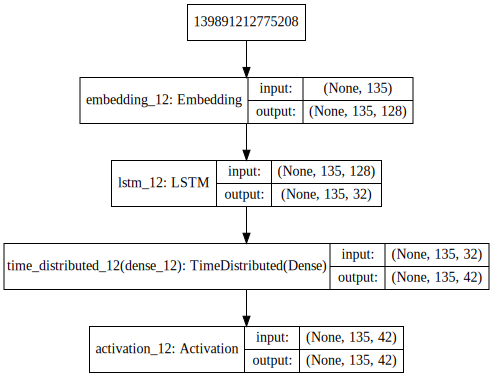

In [257]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [8]:
import keras.preprocessing.text as kpt
import json
import numpy as np
from keras.models import model_from_json

def load(string):
    max_input = 135
    # load dictionary
    with open('./model-ner-repair/dictionary-x.json','r') as dict_x:
        dictionary_x = json.load(dict_x)
    
    # input
    words = [word for word in kpt.text_to_word_sequence(string) if word in dictionary_x]
    ind_dictionary = [dictionary_x[word] for word in words]
    input_ = [0]*(max_input-len(ind_dictionary))
    input_ += ind_dictionary
#     print(len(ind_dictionary)
    input_ = np.array(input_)
    print(input_)
    
    # model
    file_model = open('./model-ner-repair/sub-model.json','r')
    load_model = file_model.read()
    file_model.close()
    
    # class    
    with open('./model-ner-repair/dictionary-y-index.json','r') as dict_y:
        dictionary_y = json.load(dict_y)
    
    print(dictionary_y)
    
    model = model_from_json(load_model)
    model.load_weights('./model-ner-repair/model.hdf5')
    
    pred = model.predict([[input_]])
    result = []
    for i in pred:
        for k, j in zip(words,i[-len(ind_dictionary):]):
            result.append((k,dictionary_y[str(np.argmax(j))]))
    
    return result
    

# print(X_train[0])
string = "dok penumpukan cairan di otak di sebabkan karena apa"
string2 = "dok gimana cara ngilangin perut buncit ya"
predict = load(string3)
print(predict)



[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 6845 2149 1351]
{'1': 'B-MAN', '2': 'I-LACTATION', '3': 'I-TEST', '4': 'O', '5': 'B-BABY', '6': 'I-SOMEONE', '7': 'B-ACIVITY', '8': 'B-ANTISYMPTOM', '9': 'I-ANTISYMPTOM', '10': 'B-FOOD', '11': 'B-DISEASE', '12': 'I-PREGNANT', '13': 'B-ACTIVITY', '14': 'I-CHILD', '15': 'B-PRIMARY', '16': 'I-FOOD', '17': 'B-TEST', '18': 'I-DISEASE